# PyNEC Example

This notebook is based on the [example](https://github.com/tmolteno/python-necpp/blob/8c3cf38b5c3a0e37ee390d55af42af488437e343/PyNEC/README.md) from the [python-necpp repo](https://github.com/tmolteno/python-necpp).

In [1]:
%matplotlib inline

from PyNEC import *
import numpy as np

In [2]:
#creation of a nec context
context=nec_context()

#get the associated geometry
geo = context.get_geometry()

In [3]:
#add wires to the geometry
geo.wire(0, 36, 0, 0, 0, -0.042, 0.008, 0.017, 0.001, 1.0, 1.0)
context.geometry_complete(0)

context.gn_card(-1, 0, 0, 0, 0, 0, 0, 0)

#add a "ex" card to specify an excitation
context.ex_card(1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)

#add a "fr" card to specify the frequency 
context.fr_card(0, 2, 2400.0e6, 100.0e6)

#add a "rp" card to specify radiation pattern sampling parameters and to cause program execution
context.rp_card(0, 91, 1, 0, 5, 0, 0, 0.0, 45.0, 4.0, 2.0, 1.0, 0.0)

#get the radiation_pattern
rp = context.get_radiation_pattern(0)

In [4]:
# Gains are in decibels
gains_db = rp.get_gain()
gains = 10.0**(gains_db / 10.0)
thetas = rp.get_theta_angles() * 3.1415 / 180.0
phis = rp.get_phi_angles() * 3.1415 / 180.0

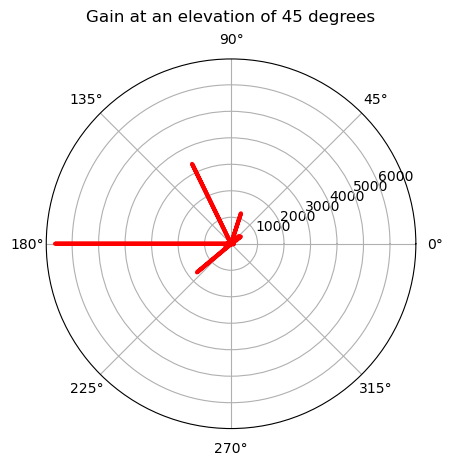

In [5]:
# Plot stuff
import matplotlib.pyplot as plt

ax = plt.subplot(111, polar=True)
ax.plot(thetas, gains[:,0], color='r', linewidth=3)
ax.grid(True)

ax.set_title("Gain at an elevation of 45 degrees", va='bottom')
plt.savefig('RadiationPattern.png')
plt.show()